# sklearnの確認問題

## 必要モジュールのインポート

この問題で使うモジュールをインポートします。

In [1]:
import pandas as pd

## 前準備




### データの読み取り
scikit-learnから提供される`iris`というデータセットを読み込みます。

In [5]:
from sklearn.datasets import load_iris
iris = load_iris()

#説明変数の読み取り
data = iris.data
feature_names = iris.feature_names
df_data = pd.DataFrame(data=data, columns=feature_names)

#目的変数の読み取り
target = iris.target
target_names = iris.target_names
df_target = pd.DataFrame(data=target, columns=['target'])

### 問1. 説明変数の把握

1.1. `df_data` の先頭五行を表示してください。

In [6]:
df_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


1.2. `df_data` の行数と列数を表示しましょう。

In [8]:
df_data.shape

(150, 4)

1.3. `df_data` の各列の `mean`, `count`, `std` などの基本特徴量を表示しましょう。


In [12]:
stats = df_data.describe()
print(stats)

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


1.4. `df_data` に欠損値がないかを確認しましょう。

In [13]:
print(df_data.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


### 問2. 目的変数の把握

2.1. `df_target` のうち、ランダムに 10 行表示しましょう。

目的変数の数字はそれぞれ、

- 0 が `setosa`（ヒオウギアヤメ）
- 1 が `versicolor`（ブルーフラッグ）
- 2 が `virginica`（バージニカ）

を指しています。


In [19]:
random_rows = df_target.sample(n=10)
print(random_rows)

     target
122       2
50        1
15        0
83        1
14        0
85        1
98        1
116       2
74        1
36        0


### 問3. データの可視化

3.1. x 軸を petal length (cm)、y 軸を petal width (cm)にして散布図を作成しましょう。 ただし、目的変数に応じて点の色と形を変更してください。

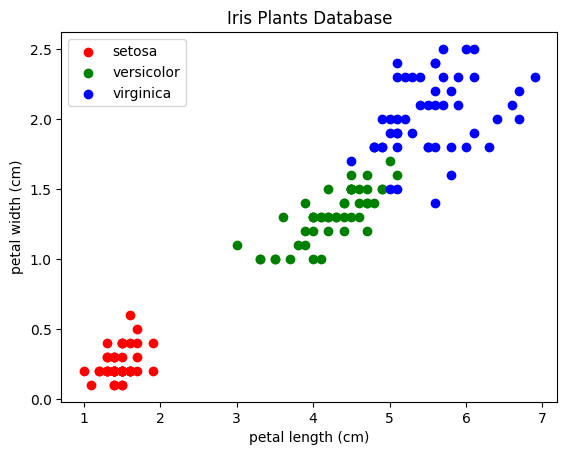

In [21]:
import matplotlib.pyplot as plt
plt.scatter(df_data[df_target['target']==0]['petal length (cm)'],df_data[df_target['target']==0]['petal width (cm)'],label="setosa",color='red')
plt.scatter(df_data[df_target['target']==1]['petal length (cm)'],df_data[df_target['target']==1]['petal width (cm)'],label="versicolor",color='green')
plt.scatter(df_data[df_target['target']==2]['petal length (cm)'],df_data[df_target['target']==2]['petal width (cm)'],label="virginica",color='blue')
plt.title('Iris Plants Database')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()

## 機械学習


### 問4. データの分割

4.1. iris データを 4:1 に分割して、80% を学習データとして 20% をテストデータとしてください。

ただし、分割した後の変数名は以下の通りにしてください。

| 変数名  |      内容      |
| :-----: | :------------: |
| x_train | 学習用の説明変数 |
| x_test | テスト用の説明変数 |
| y_train | 学習用の目的変数 |
| y_test | テスト用の目的変数 |

学習データでモデルの学習を行い、テストデータでモデルの評価を行います。


4.2. 本当に4:1に分割できているか確認しましょう。

x_train :  (120, 4)
x_test :  (30, 4)
y_train :  (120, 1)
y_test :  (30, 1)


### 問5. 学習

5.1. RandamForest の学習モデルのインスタンスを生成しましょう。

5.2. `x_train` と `y_train` を用いて、モデルを学習させましょう。

<ipython-input-13-139fa7af76d2>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


RandomForestClassifier()

### 問6. 推論


6.1. 学習したモデルに `x_test` を入力して予測をしましょう。

6.2. 予測結果と `y_test` に対して、`accuracy` を計算することでモデルを評価しましょう。

0.9666666666666667

実は、iris データセットはかなり簡単な分布をしているので、正解率はほぼ 100% になったと思います。